# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [3]:
#My objective: How many LRA owned properties in the city of St. Louis are sold and converted into
#single family homes? Additionally - how many remain in disrepair and how many are
#purchased by investors for other purposes?

#To answer these questions, I'm analyzing several data sources - Property Sales, Occupancy Permits and Demolition Permits. 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pyplot as mlab
import matplotlib
plt.style.use('ggplot')
import csv

import mplcyberpunk
plt.style.use('cyberpunk')

In [5]:
#I ran into my first issue here. My data came from the St. Louis Regional Data Exchange and some of the 
#files were .mdb. Much Googling led me to the site https://www.mdbopener.com/ where I could convert to .csv

# These are building permits found here https://www.stlouis-mo.gov/data/datasets/dataset.cfm?id=1
building = pd.read_csv("building-permits-fields.csv")
        

In [6]:
#Parcel Sales found here https://rdx.stldata.org/dataset/property-sales/resource/4f2d771f-1ee4-435b-8693-de85c10e2d8a
sales = pd.read_csv("property-sales-fields.csv")

In [7]:
#I decided to focus only on the last 10 years for simplicity sake.
# These are Occupancy Permits found here https://rdx.stldata.org/dataset/occupancy-permits
twelve = pd.read_csv("2012.csv")
thirteen = pd.read_csv("2013.csv")
fourteen = pd.read_csv("2014.csv")
fifteen = pd.read_csv("2015.csv")
sixteen = pd.read_csv("2016.csv")
seventeen = pd.read_csv("2017.csv")
eighteen = pd.read_csv("2018.csv") 
nineteen = pd.read_csv("2019.csv")
twenty = pd.read_csv("2020.csv")
twentyone = pd.read_csv("2021.csv")
twentytwo = pd.read_csv("2022.csv")

In [8]:
#Demolition Permits
demo = pd.read_csv("demolition-permits-fields.csv")

In [9]:
#lra list found here https://rdx.stldata.org/dataset/lra-property/resource/6cd75ecb-94fa-4601-b598-19cf651ca544
boardup = pd.read_csv("dbo_vw_boardup_public.csv")
public = pd.read_csv("dbo_vw_public_inventory.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [10]:
boardup.columns, public.columns
boardup.info, public.info

(<bound method DataFrame.info of        Record_No  Work_Ticket_No      Contract_Date    Completion_date  \
 0          29468               1  06/01/00 00:00:00  06/01/00 00:00:00   
 1          36051               2  08/30/00 00:00:00  08/30/00 00:00:00   
 2          39081               3  08/31/00 00:00:00  09/12/00 00:00:00   
 3          37071               4  11/09/00 00:00:00  11/09/00 00:00:00   
 4          39103              11  03/06/00 00:00:00  03/06/00 00:00:00   
 ...          ...             ...                ...                ...   
 22794      46712           50364  08/17/17 00:00:00  08/17/17 00:00:00   
 22795      49869           50437  09/13/17 00:00:00  09/14/17 00:00:00   
 22796      49862           50438  09/13/17 00:00:00  09/14/17 00:00:00   
 22797      47506           50439  09/13/17 00:00:00  09/14/17 00:00:00   
 22798      49970           50481  09/20/17 00:00:00  09/21/17 00:00:00   
 
          Assigned_to  Secure  Locks_Hasp Priority  
 0      Board

In [11]:
sales.columns

Index(['DATAFORMAT', 'DATASETID', 'DATATYPEID', 'DESCRIPTION',
       'DISTRIBUTIONID', 'LABEL', 'NAME', 'VOCABULARYID'],
      dtype='object')

In [12]:
sales.columns

Index(['DATAFORMAT', 'DATASETID', 'DATATYPEID', 'DESCRIPTION',
       'DISTRIBUTIONID', 'LABEL', 'NAME', 'VOCABULARYID'],
      dtype='object')

In [13]:
boardup.describe(), public.describe()

(          Record_No  Work_Ticket_No        Secure    Locks_Hasp
 count  22799.000000    22799.000000  22799.000000  22799.000000
 mean   41512.925216    26020.046099      0.924602      0.284135
 std     4592.588723    14141.444660      0.264038      0.451011
 min    29112.000000        1.000000      0.000000      0.000000
 25%    38835.000000    14220.500000      1.000000      0.000000
 50%    41509.000000    27462.000000      1.000000      0.000000
 75%    44985.500000    38536.500000      1.000000      1.000000
 max    50006.000000    50481.000000      1.000000      1.000000,
           Record_No        Handle      ParcelID       Address        CenterX  \
 count  11800.000000  1.180000e+04  1.180000e+04  11800.000000    6893.000000   
 mean   41084.274407  1.383272e+10  3.831837e+10   3944.195085  573656.263752   
 std     5835.628602  1.269665e+09  1.271234e+10   1536.756226   13958.096178   
 min    29063.000000  1.001700e+10  9.320022e+07      0.000000       0.000000   
 25%    3

In [14]:
boardup.mean()

Record_No         41512.925216
Work_Ticket_No    26020.046099
Secure                0.924602
Locks_Hasp            0.284135
dtype: float64

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATAFORMAT      0 non-null      float64
 1   DATASETID       5 non-null      int64  
 2   DATATYPEID      5 non-null      int64  
 3   DESCRIPTION     3 non-null      object 
 4   DISTRIBUTIONID  5 non-null      int64  
 5   LABEL           1 non-null      object 
 6   NAME            5 non-null      object 
 7   VOCABULARYID    5 non-null      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 448.0+ bytes


In [16]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATAFORMAT      0 non-null      float64
 1   DATASETID       79 non-null     int64  
 2   DATATYPEID      79 non-null     int64  
 3   DESCRIPTION     79 non-null     object 
 4   DISTRIBUTIONID  79 non-null     int64  
 5   LABEL           79 non-null     object 
 6   NAME            79 non-null     object 
 7   VOCABULARYID    79 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.1+ KB


In [17]:
building.describe()

,DATAFORMAT,DATASETID,DATATYPEID,DISTRIBUTIONID,VOCABULARYID
count,0.0,79.0,79.000000,79.0,79.000000
mean,NaN,1.0,110.075949,0.0,2.455696
std,NaN,0.0,1.906616,0.0,5.826107
min,NaN,1.0,109.000000,0.0,0.000000
25%,NaN,1.0,109.000000,0.0,0.000000
50%,NaN,1.0,109.000000,0.0,0.000000
75%,NaN,1.0,110.000000,0.0,0.000000
max,NaN,1.0,115.000000,0.0,17.000000


In [18]:
#This is a basic look at the occupany permits issued in year 2012, I can see things like description: single family, city block, parcel ID, etc.
twelve.info

<bound method DataFrame.info of       ADDRADJUSTED  ADDRNUM ADDRSUF                APPDATE  \
0                0     8459          2012-01-03 00:00:00.0   
1                0     2847          2012-01-03 00:00:00.0   
2                0     2218          2012-01-04 00:00:00.0   
3                0     3270          2012-01-04 00:00:00.0   
4                0     3010          2012-01-04 00:00:00.0   
...            ...      ...     ...                    ...   
2069             0     5860          2012-12-28 00:00:00.0   
2070             0     5027          2012-12-28 00:00:00.0   
2071             0      835          2012-12-28 00:00:00.0   
2072             0      200          2012-12-31 00:00:00.0   
2073             0     4127          2012-12-31 00:00:00.0   

                                         APPDESCRIPTION  APPNUM APPTYPE  \
0                           SINGLE FAMILY ( SECTION 8 )  495427      AO   
1                      BOOKSTORE 1ST FL , 2ND FL OFFICE  495437      AO  

In [19]:
#What are the columns in the various occupancy permit years?
twelve.columns

Index(['ADDRADJUSTED', 'ADDRNUM', 'ADDRSUF', 'APPDATE', 'APPDESCRIPTION',
       'APPNUM', 'APPTYPE', 'ASRNBRHD', 'CANCELDATE', 'CANCELTYPE',
       'CAREOFADDR', 'CAREOFCITY', 'CAREOFNAME', 'CAREOFSTATE', 'CAREOFZIP',
       'CDADIST', 'CDASUBDIST', 'CENSBLOCK00', 'CITYBLOCK', 'COMPLETEDATE',
       'ESTPROJECTCOST', 'FIRSTDATE', 'GEOCITYBLOCKPART', 'HANDLE',
       'ISSUEDATE', 'LASTDATE', 'MAINSTRUCTYPE', 'NBRHD', 'NBROFUNITS',
       'NEWUSE', 'NEWUSEGROUP1', 'NEWUSEGROUP2', 'NEWUSEGROUP3', 'NLC',
       'OCCNAME', 'OLDUSE', 'OLDUSEGROUP1', 'OLDUSEGROUP2', 'OLDUSEGROUP3',
       'OWNERADDR', 'OWNERCITY', 'OWNERCODE', 'OWNERNAME', 'OWNERSTATE',
       'OWNERZIP', 'PARCEL', 'PARCEL9', 'PARITY', 'POLICEDIST', 'PRCLERR',
       'PRECINCT02', 'PROJECTTYPE', 'STDIR', 'STNAME', 'STRUCTYPE1',
       'STRUCTYPE2', 'STRUCTYPE3', 'STTYPE', 'TMPCITYBLOCK', 'TMPPARCEL',
       'UNITNUM', 'UPDATEGEO', 'WARD00'],
      dtype='object')

In [20]:
#How many occupancy permit applications were there each year?
twelve["APPNUM"].count(), thirteen["APPNUM"].count(), fourteen["APPNUM"].count(), fifteen["APPNUM"].count(), 

(2074, 2077, 2156, 1881)

In [21]:
sixteen["APPNUM"].count(), seventeen["APPNUM"].count(), eighteen["APPNUM"].count(), nineteen["APPNUM"].count(), 


(1766, 2050, 2222, 2148)

In [22]:
twenty["APPNUM"].count(), twentyone["APPNUM"].count(), twentytwo["APPNUM"].count()

(1955, 1968, 129)

In [23]:
#What are the columns in the LRA public records list?
public.columns

Index(['Record_No', 'Handle', 'ParcelID', 'Address', 'Add_Suffix', 'Direction',
       'Name', 'Type', 'Class', 'Acquisition_dt', 'CenterX', 'CenterY',
       'Value', 'Value_Estimated', 'Value_Est_Dt', 'Entered_Date', 'Usage',
       'Cost', 'Property_Source', 'Purchase_Type', 'Parcel_Status'],
      dtype='object')

In [24]:
public[["Parcel_Status"]].describe()

,Parcel_Status
count,11799
unique,8
top,Available
freq,9434


In [25]:
public[["Value_Estimated"]].describe()

,Value_Estimated
count,11800.000000
mean,0.159831
std,0.366464
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
#Wait a minute. Why don't I combine all the years? Duh moment. 

occ = pd.concat([twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twentyone, twentytwo]).reset_index(drop=True)
occ

,ADDRADJUSTED,ADDRNUM,ADDRSUF,APPDATE,APPDESCRIPTION,APPNUM,APPTYPE,ASRNBRHD,CANCELDATE,CANCELTYPE,...,STNAME,STRUCTYPE1,STRUCTYPE2,STRUCTYPE3,STTYPE,TMPCITYBLOCK,TMPPARCEL,UNITNUM,UPDATEGEO,WARD00
0,0,8459,,2012-01-03 00:00:00.0,SINGLE FAMILY ( SECTION 8 ),495427,AO,334,NaN,NaN,...,CONCORD,1,0,0,PL,5636.00,270,,NaN,NaN
1,0,2847,,2012-01-03 00:00:00.0,"BOOKSTORE 1ST FL , 2ND FL OFFICE",495437,AO,142,NaN,NaN,...,CHEROKEE,20,0,0,ST,1510.00,390,,NaN,NaN
2,0,2218,,2012-01-04 00:00:00.0,WEB DESIGN & DEVELOPMENT OFFICE,495445,AO,146,NaN,NaN,...,CHEROKEE,20,0,0,ST,1558.00,306,,NaN,NaN
3,0,3270,,2012-01-04 00:00:00.0,OFFICE SPACE (REAL ESTATE) SUITE 100,495446,AO,119,NaN,NaN,...,HAMPTON,20,0,0,AV,4757.03,35,,NaN,NaN
4,0,3010,,2012-01-04 00:00:00.0,OFFICE SPACE -STE 100,495448,AO,255,NaN,NaN,...,LOCUST,20,0,0,ST,1021.03,8062,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20421,0,1401,NaN,2022-01-28 00:00:00.0,CHURCH,7579,AO,238,NaN,NaN,...,KINGSHIGHWAY,0,0,0,BLVD,3789.00,260,,2022-01-28 00:00:00.0,NaN
20422,0,826,NaN,2022-01-28 00:00:00.0,OFFICE SPACE USED FOR HOME HEALTH CARE.,7580,AO,238,NaN,NaN,...,UNION,0,0,0,BLVD,4846.00,10,0,2022-01-28 00:00:00.0,NaN
20423,0,3106,NaN,2022-01-28 00:00:00.0,"CONVENIENCE STORE WITH COOKING (NO LIQUOR, NO ...",7581,AO,141,NaN,NaN,...,CHEROKEE,0,0,0,ST,1580.00,145,,2022-01-28 00:00:00.0,NaN
20424,0,4759,NaN,2022-01-28 00:00:00.0,REPAIR AND SERVICE,7582,AO,101,NaN,NaN,...,NEBRASKA,0,0,0,AV,2757.00,310,1,2022-01-28 00:00:00.0,NaN


In [27]:
#At this point I got super aggravated with myself. 
#I'm looking at too much data here. If I'm just interested in residential properties, 
#the city conveniently provides that data in downloadable .csv files. 
#I downloaded additional information and will review those going forward. I'll leave the other files, 
#they are informative. Just more than I need to answer my questions.

Building2=pd.read_csv("Building-Permits-2012-2022-residential.csv")
Occ2=pd.read_csv("Occupancy-Permits-2012-2022-residential.csv")
Demo2=pd.read_csv("Demolition-Permits-2012-2022-all.csv")

In [28]:
Building2.describe()

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
count,11.000000,0.0,11.000000,11.000000,1.100000e+01,11.000000
mean,15.363636,NaN,1458.000000,2079.000000,1.582412e+08,2017.000000
std,11.664242,NaN,714.179109,640.647641,5.903341e+07,3.316625
min,5.000000,NaN,131.000000,276.000000,5.513541e+07,2012.000000
25%,7.000000,NaN,1042.500000,2028.500000,1.156440e+08,2014.500000
50%,7.000000,NaN,1877.000000,2338.000000,1.661294e+08,2017.000000
75%,24.500000,NaN,1917.000000,2384.000000,2.086064e+08,2019.500000
max,33.000000,NaN,2003.000000,2583.000000,2.426445e+08,2022.000000


In [29]:
Building2.head(11)

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
0,7,NaN,1566,1783,9.914294e+07,2012
1,5,NaN,1782,1997,1.021362e+08,2013
2,7,NaN,1902,2252,2.052795e+08,2014
3,7,NaN,1968,2354,1.291519e+08,2015
4,7,NaN,1932,2338,1.661294e+08,2016
5,7,NaN,2003,2461,1.734234e+08,2017
6,17,NaN,1897,2351,2.119332e+08,2018
7,14,NaN,1877,2414,1.362937e+08,2019
8,33,NaN,461,2060,2.193827e+08,2020
9,33,NaN,519,2583,2.426445e+08,2021


In [30]:
 Demo2.describe()

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
count,11.000000,0.0,11.000000,11.000000,1.100000e+01,11.000000
mean,53.727273,NaN,81.545455,505.181818,5.532843e+06,2017.000000
std,26.457857,NaN,24.804692,222.890923,2.327098e+06,3.316625
min,30.000000,NaN,11.000000,54.000000,5.699100e+05,2012.000000
25%,35.000000,NaN,80.500000,411.000000,4.586198e+06,2014.500000
50%,44.000000,NaN,88.000000,479.000000,5.106651e+06,2017.000000
75%,66.500000,NaN,93.000000,607.500000,6.654062e+06,2019.500000
max,118.000000,NaN,104.000000,942.000000,9.635290e+06,2022.000000


In [31]:
Demo2.head(11)

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
0,35,NaN,89,424,5553366.99,2012
1,30,NaN,80,348,4423549.00,2013
2,36,NaN,81,398,6569208.00,2014
3,32,NaN,94,526,5090889.00,2015
4,44,NaN,92,475,4748847.81,2016
5,35,NaN,84,596,9635290.00,2017
6,55,NaN,98,619,6738916.50,2018
7,73,NaN,104,942,5106651.00,2019
8,118,NaN,76,696,4339030.00,2020
9,63,NaN,88,479,8085616.00,2021


In [32]:
 Occ2.describe()

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
count,11.000000,0.0,11.000000,11.000000,11.000000,11.000000
mean,38.454545,NaN,168.363636,463.272727,110363.636364,2017.000000
std,17.985348,NaN,69.161077,194.547727,188371.055487,3.316625
min,18.000000,NaN,23.000000,27.000000,0.000000,2012.000000
25%,23.500000,NaN,130.000000,396.500000,0.000000,2014.500000
50%,37.000000,NaN,167.000000,455.000000,0.000000,2017.000000
75%,45.000000,NaN,216.500000,581.500000,146000.000000,2019.500000
max,76.000000,NaN,251.000000,710.000000,600000.000000,2022.000000


In [33]:
Occ2.head(11)

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
0,36,NaN,101,706,600000.0,2012
1,41,NaN,132,662,0.0,2013
2,42,NaN,166,710,0.0,2014
3,59,NaN,167,501,287000.0,2015
4,48,NaN,128,336,35000.0,2016
5,37,NaN,201,423,0.0,2017
6,18,NaN,251,455,0.0,2018
7,28,NaN,214,435,0.0,2019
8,76,NaN,219,471,110000.0,2020
9,19,NaN,250,370,182000.0,2021


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

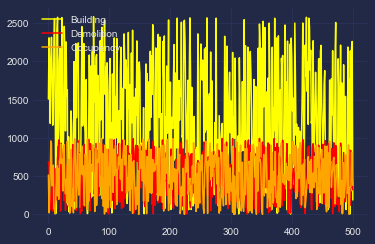

In [34]:
#How about an overlapping line chart?

Building = [1783, 1997, 2252, 2354, 2338, 2461, 2351, 2414, 260, 2583, 276]
Demo = [424, 348, 398, 526, 475, 596, 619, 942, 696, 479,54]
Occ = [706, 662, 710, 501, 336, 423, 455, 435, 471, 370, 27]


Building = np.random.randint(low = 0, high = 2600, size = 500)
Demo = np.random.randint(low = 0, high = 1000, size = 500)
Occ = np.random.randint(low = 0, high = 1000, size = 500)

fig, ax = plt.subplots()

ax.plot(Building, color = 'yellow', label = 'Building')
ax.plot(Demo, color = 'red', label = 'Demolition')
ax.plot(Occ, color = 'orange', label = 'Occupancy')
ax.legend(loc = 'upper left')
plt.show()

#Ok, I at least got visualization too work but it's hard to read. 

In [35]:
#Can I concatenate the dataframes?
Permits = pd.concat([Building2, Demo2, Occ2]).reset_index(drop=True)
Permits

,AVGDAYSTOISSUE,CANCELTYPE,NUMBERISSUEDINTARGETDAYS,TOTALNUMBER,TOTALVALUE,YEAR
0,7,NaN,1566,1783,9.914294e+07,2012
1,5,NaN,1782,1997,1.021362e+08,2013
2,7,NaN,1902,2252,2.052795e+08,2014
3,7,NaN,1968,2354,1.291519e+08,2015
4,7,NaN,1932,2338,1.661294e+08,2016
5,7,NaN,2003,2461,1.734234e+08,2017
6,17,NaN,1897,2351,2.119332e+08,2018
7,14,NaN,1877,2414,1.362937e+08,2019
8,33,NaN,461,2060,2.193827e+08,2020
9,33,NaN,519,2583,2.426445e+08,2021


In [36]:
#Looking only at permit numbers

Years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

Building = [1783,1997,2252,2354,2338,2461,2351,2414,260,2583,276]

Demo = [424, 348, 398, 526, 475,596, 619, 942, 696, 479,54]

Occ = [706, 662, 710, 501, 336,423, 455, 435, 471, 370, 27]


df_permits = pd.DataFrame(
    {'Years' : Years, 'Building' : Building, 'Demolition' : Demo, 
    'Occupancy' : Occ})

df_permits

,Years,Building,Demolition,Occupancy
0,2012,1783,424,706
1,2013,1997,348,662
2,2014,2252,398,710
3,2015,2354,526,501
4,2016,2338,475,336
5,2017,2461,596,423
6,2018,2351,619,455
7,2019,2414,942,435
8,2020,260,696,471
9,2021,2583,479,370


In [37]:
df_permits.columns

Index(['Years', 'Building', 'Demolition', 'Occupancy'], dtype='object')

In [38]:
df_permits.head(20)

,Years,Building,Demolition,Occupancy
0,2012,1783,424,706
1,2013,1997,348,662
2,2014,2252,398,710
3,2015,2354,526,501
4,2016,2338,475,336
5,2017,2461,596,423
6,2018,2351,619,455
7,2019,2414,942,435
8,2020,260,696,471
9,2021,2583,479,370


Text(0, 0.5, 'Total')

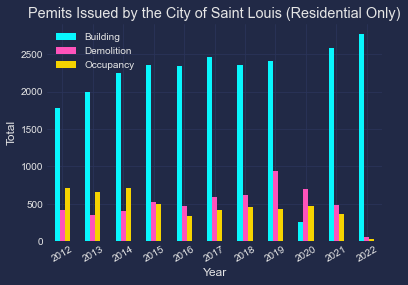

In [39]:
plotdata = pd.DataFrame(
    {"Building": [1783,1997,2252,2354,2338,2461,2351,2414,260,2583,2767],
     "Demolition": [424,348,398,526,475,596,619,942,696,479,54],
     "Occupancy": [706,662,710,501,336,423,455,435,471,370,27]
    }, 
    index=["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"])
# Plot a bar chart
plotdata.plot(kind="bar")

plt.title("Pemits Issued by the City of Saint Louis (Residential Only)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Year")
plt.ylabel("Total")

In [40]:
#I spent hours trying to make the unstacked bar chart work. 
#This wound up being exactly what I needed and I made the above chart in 5 min. 
#Definitely a "head meet desk" moment when it clicked. 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

In [174]:
#1. Some of the labels on columns are not as descriptive as I would like for my questions. 
#I also feel there may be missing data.

#2. I am wondering if I have access to all the data I need to answer the questions I am posing. 
#At the same time, I'm feeling overwhelmed that I may be sifting through too many sources.

#3. Relabeling some columns may be necessary.